# Feature Scaling Normalization

In [57]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [58]:
df = pd.read_csv(r"D:\Data Analytics\Python Scripts\Statistics\Assignment\housing.csv")
df
new_df = df[
    [
        "median_income",
        "total_rooms",
        "population",
        "households",
        "longitude",
        "total_bedrooms",
        "median_house_value",
    ]
]
new_df

,median_income,total_rooms,population,households,longitude,total_bedrooms,median_house_value
0,8.3252,880.0,322.0,126.0,-122.23,129.0,452600.0
1,8.3014,7099.0,2401.0,1138.0,-122.22,1106.0,358500.0
2,7.2574,1467.0,496.0,177.0,-122.24,190.0,352100.0
3,5.6431,1274.0,558.0,219.0,-122.25,235.0,341300.0
4,3.8462,1627.0,565.0,259.0,-122.25,280.0,342200.0
...,...,...,...,...,...,...,...
20635,1.5603,1665.0,845.0,330.0,-121.09,374.0,78100.0
20636,2.5568,697.0,356.0,114.0,-121.21,150.0,77100.0
20637,1.7000,2254.0,1007.0,433.0,-121.22,485.0,92300.0
20638,1.8672,1860.0,741.0,349.0,-121.32,409.0,84700.0


In [59]:
new_df.describe()

,median_income,total_rooms,population,households,longitude,total_bedrooms,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,3.870671,2635.763081,1425.476744,499.539680,-119.569704,537.870553,206855.816909
std,1.899822,2181.615252,1132.462122,382.329753,2.003532,421.385070,115395.615874
min,0.499900,2.000000,3.000000,1.000000,-124.350000,1.000000,14999.000000
25%,2.563400,1447.750000,787.000000,280.000000,-121.800000,296.000000,119600.000000
50%,3.534800,2127.000000,1166.000000,409.000000,-118.490000,435.000000,179700.000000
75%,4.743250,3148.000000,1725.000000,605.000000,-118.010000,647.000000,264725.000000
max,15.000100,39320.000000,35682.000000,6082.000000,-114.310000,6445.000000,500001.000000


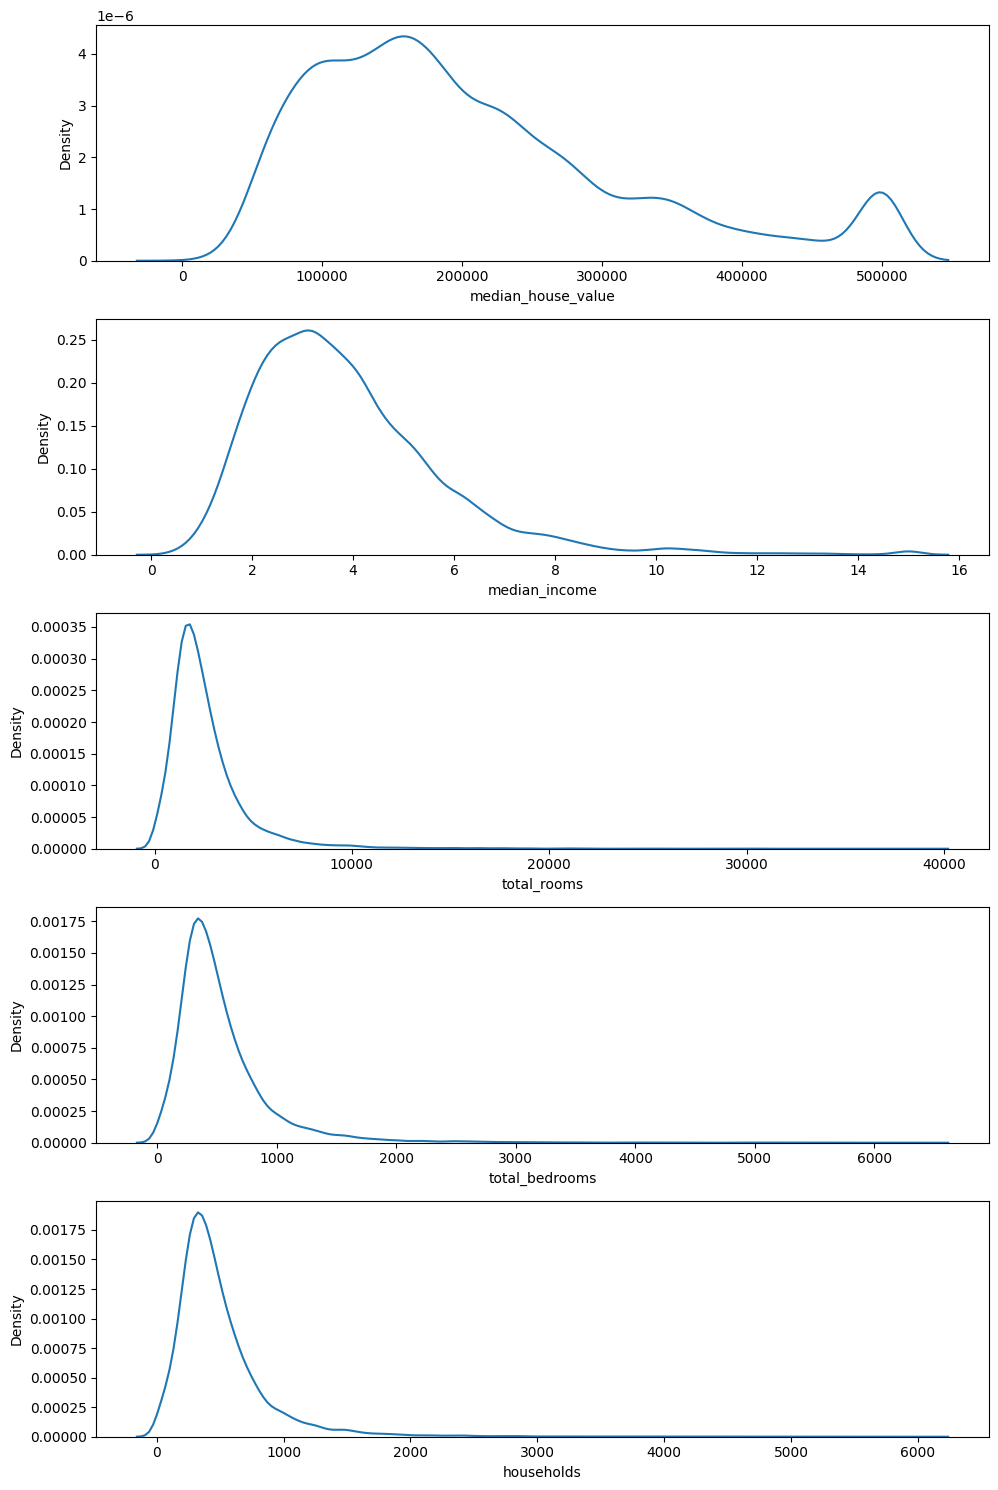

In [60]:
# Create subplots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, figsize=(10, 15))

# Plot KDEs using seaborn and pass the axes to sns.kdeplot
sns.kdeplot(new_df['median_house_value'], ax=ax1)
sns.kdeplot(new_df['median_income'], ax=ax2)
sns.kdeplot(new_df['total_rooms'], ax=ax3)
sns.kdeplot(new_df['total_bedrooms'], ax=ax4)
sns.kdeplot(new_df['households'], ax=ax5)

# Display the plots
plt.tight_layout()
plt.show()


<Axes: >

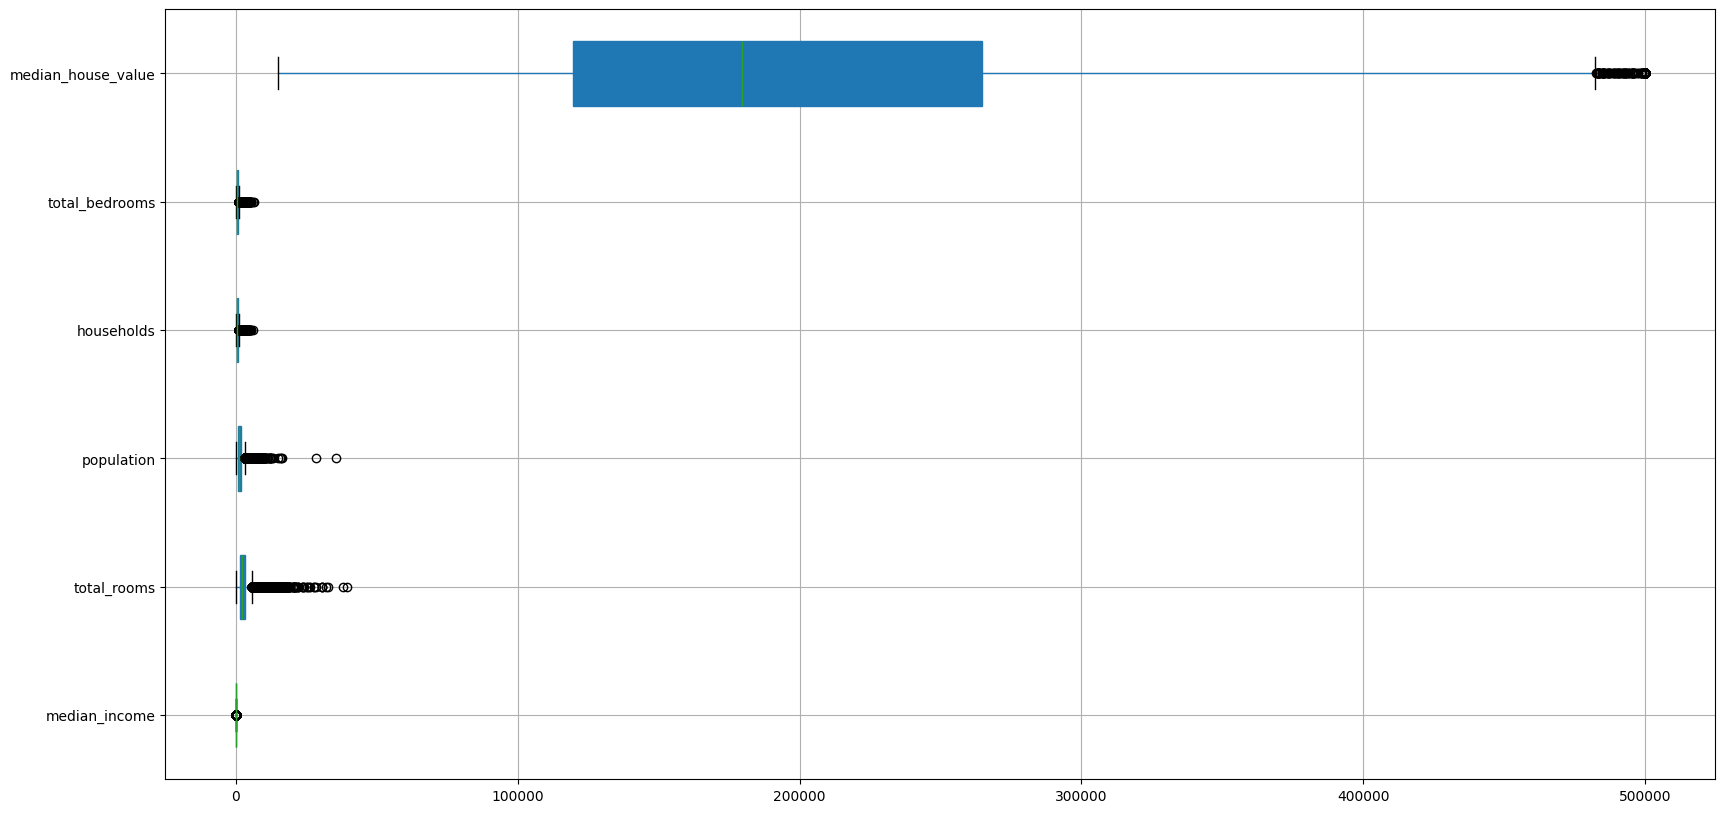

In [61]:
df.loc[
    :,
    [
        "median_income",
        "total_rooms",
        "population",
        "households",
        "total_bedrooms",
        "median_house_value",
    ],
].boxplot(
    figsize=(20, 10),
    vert=False,
    patch_artist=True,
)

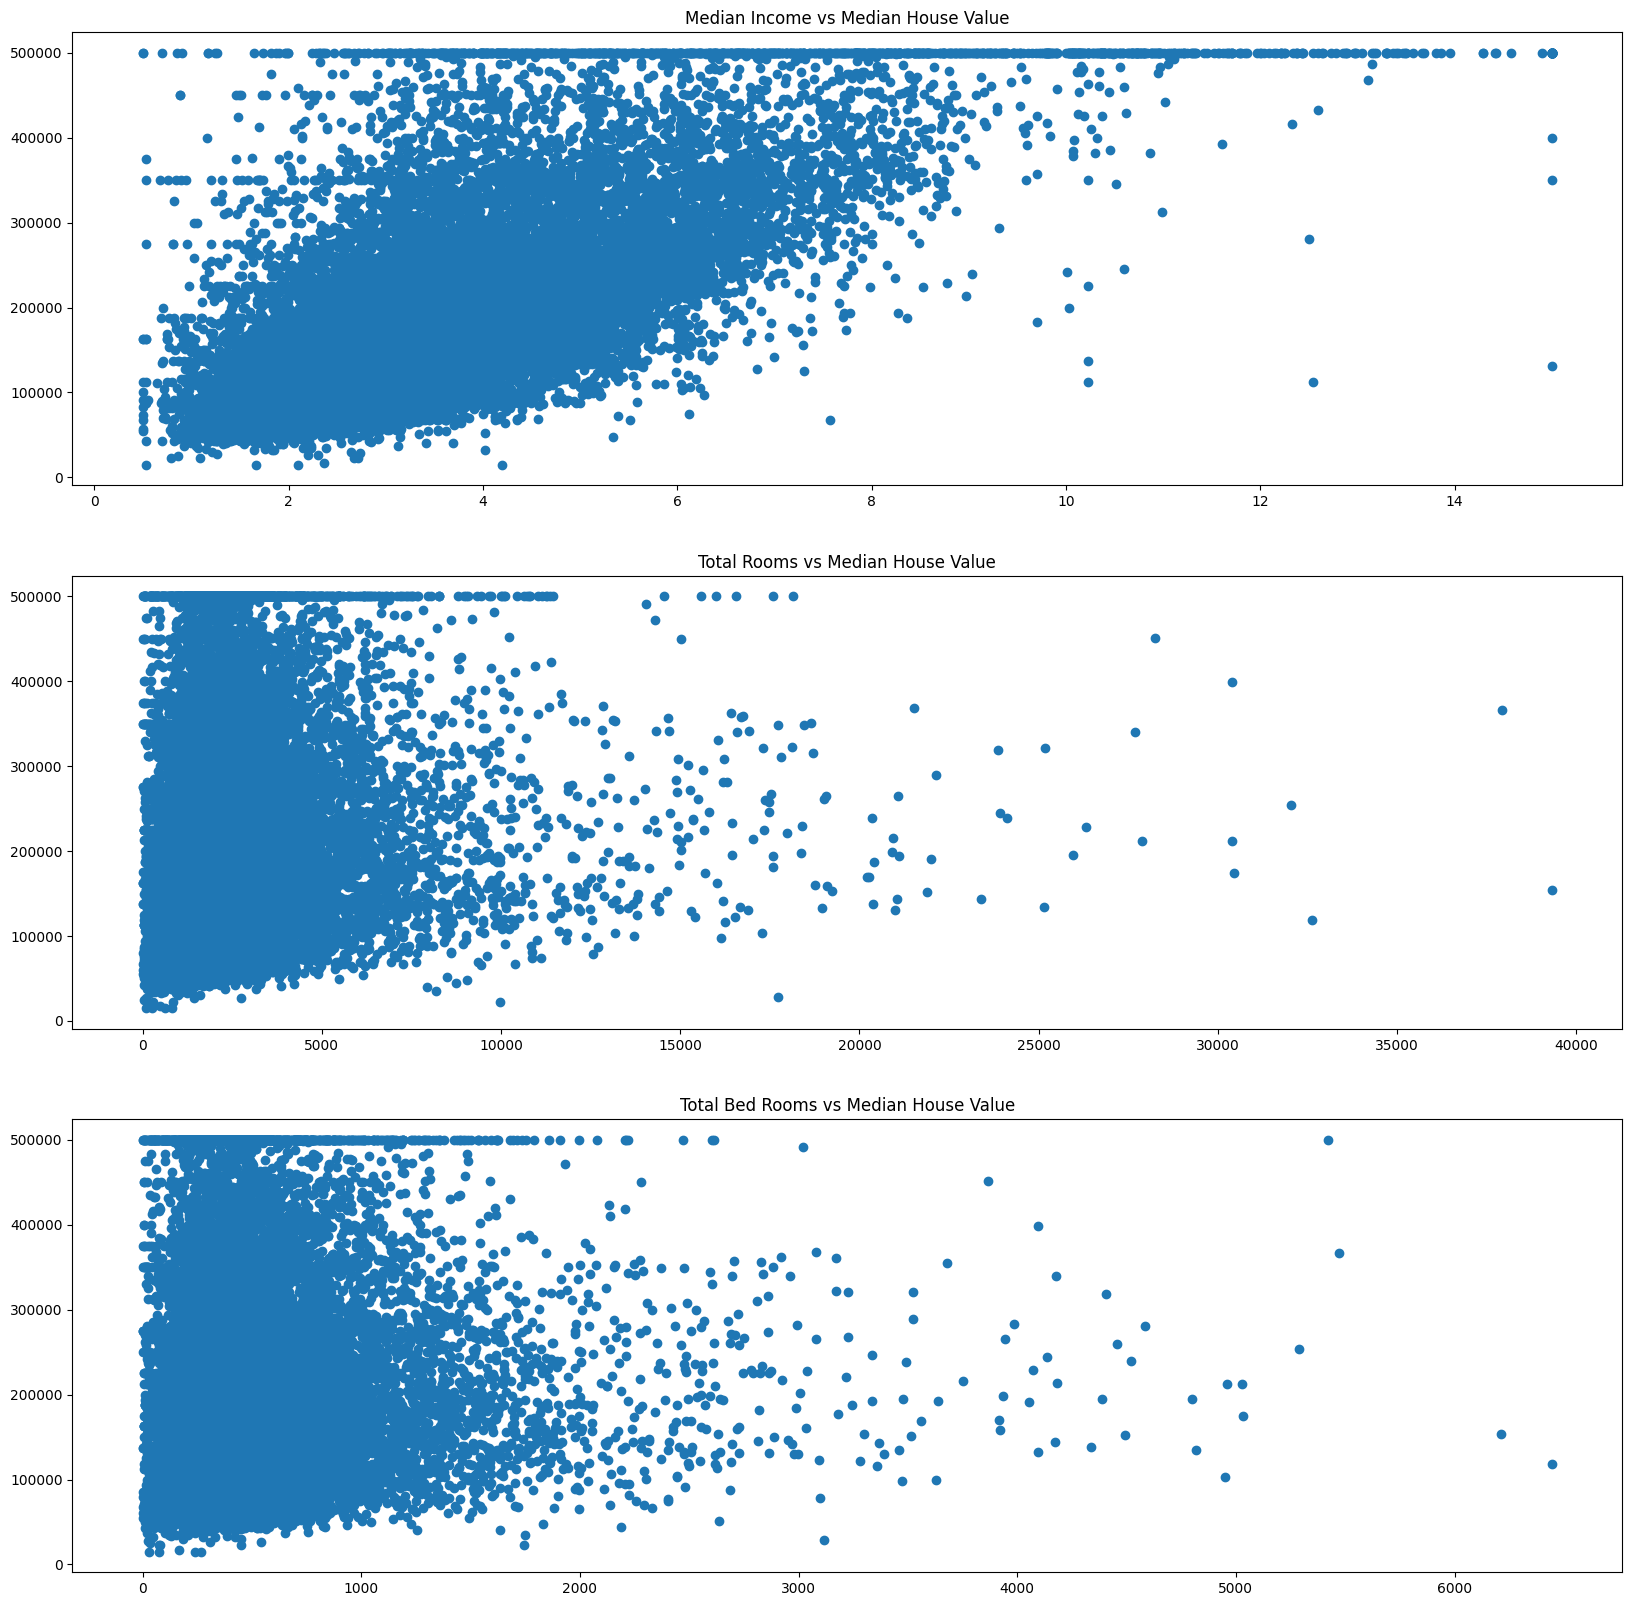

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=1,nrows=3, figsize=(20, 20))

ax1.scatter(new_df['median_income'],new_df['median_house_value'])
ax1.set_title('Median Income vs Median House Value')
ax2.scatter(new_df['total_rooms'],new_df['median_house_value'])
ax2.set_title('Total Rooms vs Median House Value')
ax3.scatter(new_df['total_bedrooms'],new_df['median_house_value'])
ax3.set_title('Total Bed Rooms vs Median House Value')


plt.show()

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(
    new_df,
    new_df["median_house_value"],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((14448, 7), (6192, 7))

In [64]:
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_test_scaled

,median_income,total_rooms,population,households,longitude,total_bedrooms,median_house_value
0,0.251852,0.064337,0.043387,0.060845,0.727092,0.061763,0.251341
1,0.364112,0.080245,0.036240,0.070383,0.635458,0.061608,0.466598
2,0.265431,0.097011,0.043471,0.087650,0.250000,0.084885,0.382887
3,0.134564,0.021670,0.010847,0.023187,0.871514,0.028864,0.118558
4,0.310685,0.050115,0.018106,0.062161,0.191235,0.060987,0.917524
...,...,...,...,...,...,...,...
6187,0.179053,0.071080,0.032652,0.080250,0.271912,0.070453,0.121651
6188,0.250941,0.226789,0.079122,0.137806,0.715139,0.184047,0.334640
6189,0.508621,0.049931,0.014574,0.035356,0.641434,0.032744,0.694638
6190,0.107992,0.017594,0.010090,0.015787,0.469124,0.018001,0.159795


In [66]:
np.round(X_train.describe(), 1)

,median_income,total_rooms,population,households,longitude,total_bedrooms,median_house_value
count,14448.0,14448.0,14448.0,14448.0,14448.0,14311.0,14448.0
mean,3.9,2640.1,1425.2,499.5,-119.6,538.3,206824.6
std,1.9,2191.6,1149.6,383.1,2.0,423.6,115365.5
min,0.5,2.0,3.0,1.0,-124.4,1.0,14999.0
25%,2.6,1451.0,784.0,279.0,-121.8,295.0,119600.0
50%,3.5,2125.0,1165.0,410.0,-118.5,435.0,180000.0
75%,4.7,3148.0,1724.0,604.0,-118.0,647.0,263900.0
max,15.0,32627.0,35682.0,6082.0,-114.3,6445.0,500001.0


In [67]:
np.round(X_train_scaled.describe(), 1)

,median_income,total_rooms,population,households,longitude,total_bedrooms,median_house_value
count,14448.0,14448.0,14448.0,14448.0,14448.0,14311.0,14448.0
mean,0.2,0.1,0.0,0.1,0.5,0.1,0.4
std,0.1,0.1,0.0,0.1,0.2,0.1,0.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.1,0.0,0.0,0.0,0.3,0.0,0.2
50%,0.2,0.1,0.0,0.1,0.6,0.1,0.3
75%,0.3,0.1,0.0,0.1,0.6,0.1,0.5
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0


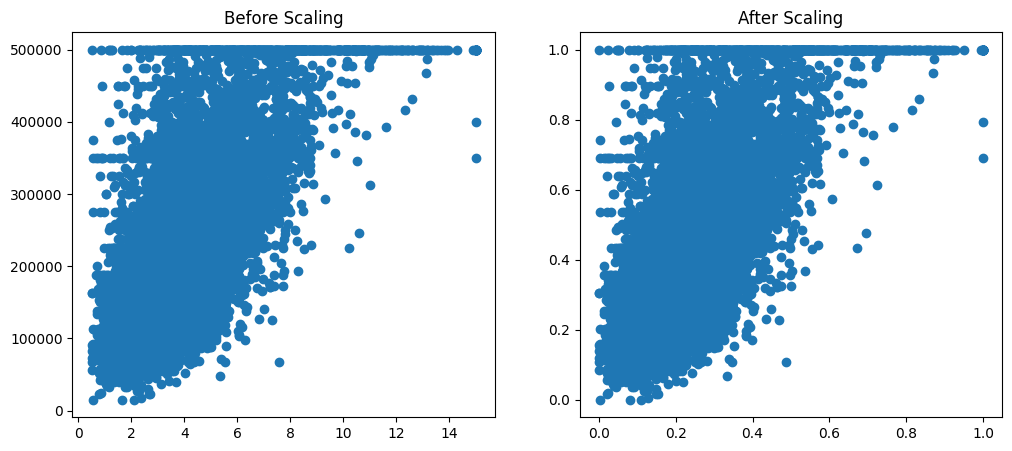

In [68]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['median_income'], X_train['median_house_value'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['median_income'], X_train_scaled['median_house_value'])
ax2.set_title("After Scaling")
plt.show()

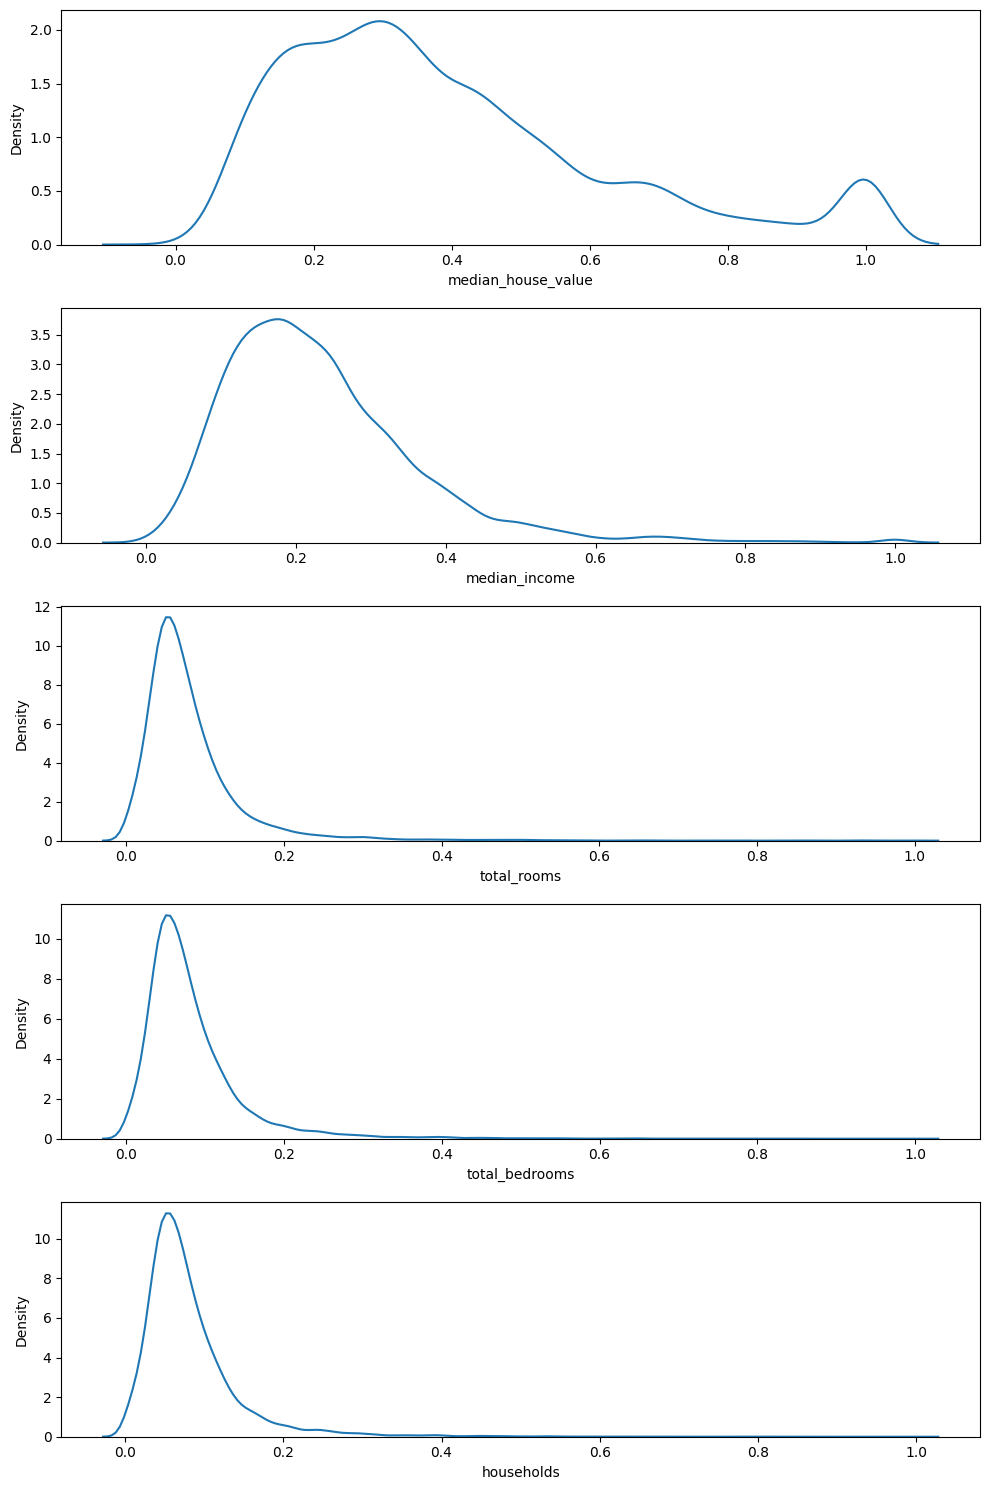

In [69]:
# Create subplots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, figsize=(10, 15))

# Plot KDEs using seaborn and pass the axes to sns.kdeplot
sns.kdeplot(X_train_scaled['median_house_value'], ax=ax1)
sns.kdeplot(X_train_scaled['median_income'], ax=ax2)
sns.kdeplot(X_train_scaled['total_rooms'], ax=ax3)
sns.kdeplot(X_train_scaled['total_bedrooms'], ax=ax4)
sns.kdeplot(X_train_scaled['households'], ax=ax5)

# Display the plots
plt.tight_layout()
plt.show()


<Axes: ylabel='Density'>

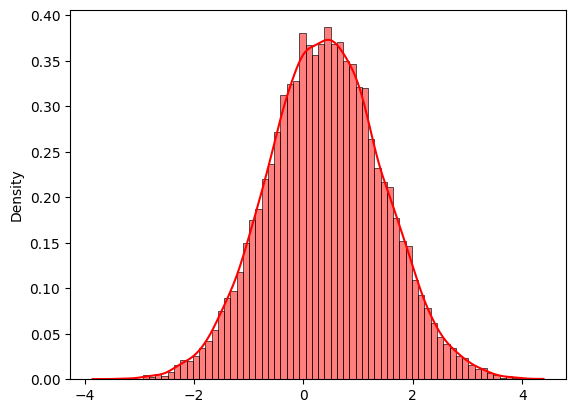

In [70]:
sns.histplot(
    np.random.normal(X_train_scaled["median_house_value"]), stat="density", kde=True, color='red'
)